In [1]:
from pathlib import Path
from pandas import DataFrame
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sbn

sbn.set()
sbn.set_palette("bright")
base_path = Path(".").absolute().parent
savefig: bool = False
auto_tests: bool = True

flapy_2022_06_19_OD = base_path/"src/results/flapy-results-OD-analysis/flapy-results_20220619_173734/!results_csvs/passed_failed_results.csv"
flapy_no_tests_to_be_run_2022_06_21_OD = base_path/"src/results/flapy-results-no-tests-to-be-run-OD-analysis/flapy-results_20220621_104756/!results_csvs/passed_failed.csv"

df = pd.read_csv(flapy_2022_06_19_OD)
df_no_tests_to_be_run = pd.read_csv(flapy_no_tests_to_be_run_2022_06_21_OD)

df = df[df['Test_classname'].notna()]
df_no_tests_to_be_run = df_no_tests_to_be_run[df_no_tests_to_be_run['Test_classname'].notna()]

# Drop if existing tests that have not been created by pynguin or un-deliberately executed by flaky
if auto_tests:
    df = df[df['Test_classname'].str.contains('pynguin_auto_tests_')]
    df_no_tests_to_be_run = df_no_tests_to_be_run[df_no_tests_to_be_run['Test_classname'].str.contains('pynguin_auto_tests_')]

In [2]:
df_OD = df[df['flaky?'] != 'non-order-dependent']
df_OD = df_OD.reset_index(drop=True)
df_no_tests_to_be_run_OD = df_no_tests_to_be_run[df_no_tests_to_be_run['flaky?'] != 'non-order-dependent']
df_no_tests_to_be_run_OD = df_no_tests_to_be_run_OD.reset_index(drop=True)


In [3]:
victim = df_OD['Passed_sameOrder'] != 0 # victim passed when run in isolation
brittle = df_OD['Passed_sameOrder'] == 0 # brittle failed when run in isolation

df_OD['Victim'] = victim
df_OD['Brittle'] = brittle

# Find out which tests are the brittles and which victims.
df_OD.loc[df_OD['Victim'] == True, 'type'] = 'victim'
df_OD.loc[df_OD['Brittle'] == True, 'type'] = 'brittle'
ratio = df_OD['type'].value_counts()
ratio_victim = float("{:.2f}".format(ratio['victim'] / ratio.sum()))
ratio_brittle = float("{:.2f}".format(ratio['brittle'] / ratio.sum()))
print('Victims: ' + str(ratio_victim) + ' :--: ' + 'Count: ' + str(ratio['victim']))
print('brittle: ' + str(ratio_brittle) + ' :--: ' + 'Count: ' + str(ratio['brittle']))

Victims: 0.71 :--: Count: 10
brittle: 0.29 :--: Count: 4


In [4]:
df_NOD = df[df['flaky?'] == 'non-order-dependent']
df_NOD

,Project_Name,Project_URL,Project_Hash,Test_filename,Test_classname,Test_funcname,Test_parametrization,flaky?,Verdicts_sameOrder,Passed_sameOrder,...,Skipped_randomOrder,#Runs_randomOrder,Flaky_sameOrder_withinIteration,Flaky_randomOrder_withinIteration,Verdict_sameOrder,Verdict_randomOrder,Order-dependent,Flaky_Infrastructure,Test_nodeid,Test_nodeid_inclPara
0,BT-Tracker,/scratch/scharnboec/FlakyRoot/projects/BT-Tracker,NaN,NaN,pynguin_auto_tests_1653025019936_4310024.test_...,test_case_0,NaN,non-order-dependent,"{'Failed', 'Passed'}",39,...,0.0,0.0,True,False,Flaky,ZeroRuns,False,False,pynguin_auto_tests_1653025019936_4310024/test_...,pynguin_auto_tests_1653025019936_4310024/test_...
10,poker,/scratch/scharnboec/FlakyRoot/projects/poker,NaN,NaN,pynguin_auto_tests_1653025019483_9018237.test_...,test_case_1,NaN,non-order-dependent,"{'Failed', 'Passed'}",39,...,0.0,0.0,True,False,Flaky,ZeroRuns,False,False,pynguin_auto_tests_1653025019483_9018237/test_...,pynguin_auto_tests_1653025019483_9018237/test_...
11,poker,/scratch/scharnboec/FlakyRoot/projects/poker,NaN,NaN,pynguin_auto_tests_1653025019483_9018237.test_...,test_case_4,NaN,non-order-dependent,"{'Failed', 'Passed'}",39,...,0.0,0.0,True,False,Flaky,ZeroRuns,False,False,pynguin_auto_tests_1653025019483_9018237/test_...,pynguin_auto_tests_1653025019483_9018237/test_...


In [5]:
victim_no_tests_to_be_run = df_no_tests_to_be_run_OD['Passed_sameOrder'] != 0 # victim passed when run in isolation
brittle_no_tests_to_be_run = df_no_tests_to_be_run_OD['Passed_sameOrder'] == 0 # brittle failed when run in isolation

df_no_tests_to_be_run_OD['Victim'] = victim_no_tests_to_be_run
df_no_tests_to_be_run_OD['Brittle'] = brittle_no_tests_to_be_run

# Find out which tests are the brittles and which victims.
df_no_tests_to_be_run_OD.loc[df_no_tests_to_be_run_OD['Victim'] == True, 'type'] = 'victim'
df_no_tests_to_be_run_OD.loc[df_no_tests_to_be_run_OD['Brittle'] == True, 'type'] = 'brittle'
ratio = df_no_tests_to_be_run_OD['type'].value_counts()
ratio_victim = float("{:.2f}".format(ratio['victim'] / ratio.sum()))
ratio_brittle = float("{:.2f}".format(ratio['brittle'] / ratio.sum()))
print('Victims: ' + str(ratio_victim) + ' :--: ' + 'Count: ' + str(ratio['victim']))
print('brittle: ' + str(ratio_brittle) + ' :--: ' + 'Count: ' + str(ratio['brittle']))

Victims: 0.69 :--: Count: 40
brittle: 0.31 :--: Count: 18


In [6]:
df_OD

,Project_Name,Project_URL,Project_Hash,Test_filename,Test_classname,Test_funcname,Test_parametrization,flaky?,Verdicts_sameOrder,Passed_sameOrder,...,Flaky_randomOrder_withinIteration,Verdict_sameOrder,Verdict_randomOrder,Order-dependent,Flaky_Infrastructure,Test_nodeid,Test_nodeid_inclPara,Victim,Brittle,type
0,SCout,/scratch/scharnboec/FlakyRoot/projects/SCout,NaN,NaN,pynguin_auto_tests_1653025019956_2079184.test_...,test_case_2,NaN,not flaky,{'Failed'},0,...,False,Failed,ZeroRuns,False,False,pynguin_auto_tests_1653025019956_2079184/test_...,pynguin_auto_tests_1653025019956_2079184/test_...,False,True,brittle
1,SCout,/scratch/scharnboec/FlakyRoot/projects/SCout,NaN,NaN,pynguin_auto_tests_1653025019956_2079184.test_...,test_case_4,NaN,not flaky,{'Passed'},40,...,False,Passed,ZeroRuns,False,False,pynguin_auto_tests_1653025019956_2079184/test_...,pynguin_auto_tests_1653025019956_2079184/test_...,True,False,victim
2,SCout,/scratch/scharnboec/FlakyRoot/projects/SCout,NaN,NaN,pynguin_auto_tests_1653025019956_2079184.test_...,test_case_7,NaN,not flaky,{'Failed'},0,...,False,Failed,ZeroRuns,False,False,pynguin_auto_tests_1653025019956_2079184/test_...,pynguin_auto_tests_1653025019956_2079184/test_...,False,True,brittle
3,SCout,/scratch/scharnboec/FlakyRoot/projects/SCout,NaN,NaN,pynguin_auto_tests_1653025019956_2079184.test_...,test_case_8,NaN,not flaky,{'Passed'},40,...,False,Passed,ZeroRuns,False,False,pynguin_auto_tests_1653025019956_2079184/test_...,pynguin_auto_tests_1653025019956_2079184/test_...,True,False,victim
4,Tale,/scratch/scharnboec/FlakyRoot/projects/Tale,NaN,NaN,pynguin_auto_tests_1653025019677_3296969.test_...,test_case_0,NaN,not flaky,{'Failed'},0,...,False,Failed,ZeroRuns,False,False,pynguin_auto_tests_1653025019677_3296969/test_...,pynguin_auto_tests_1653025019677_3296969/test_...,False,True,brittle
5,access-modifiers,/scratch/scharnboec/FlakyRoot/projects/access-...,NaN,NaN,pynguin_auto_tests_1653025019959_4930659.test_...,test_case_1,NaN,not flaky,{'Failed'},0,...,False,Failed,ZeroRuns,False,False,pynguin_auto_tests_1653025019959_4930659/test_...,pynguin_auto_tests_1653025019959_4930659/test_...,False,True,brittle
6,access-modifiers,/scratch/scharnboec/FlakyRoot/projects/access-...,NaN,NaN,pynguin_auto_tests_1653025019959_4930659.test_...,test_case_2,NaN,not flaky,{'Passed'},40,...,False,Passed,ZeroRuns,False,False,pynguin_auto_tests_1653025019959_4930659/test_...,pynguin_auto_tests_1653025019959_4930659/test_...,True,False,victim
7,freezegun,/scratch/scharnboec/FlakyRoot/projects/freezegun,NaN,NaN,pynguin_auto_tests_1653025019436_6809546.test_...,test_case_0,NaN,not flaky,{'Passed'},40,...,False,Passed,ZeroRuns,False,False,pynguin_auto_tests_1653025019436_6809546/test_...,pynguin_auto_tests_1653025019436_6809546/test_...,True,False,victim
8,keras-layer-normalization,/scratch/scharnboec/FlakyRoot/projects/keras-l...,NaN,NaN,pynguin_auto_tests_1653025020114_2411217.test_...,test_case_2,NaN,not flaky,{'Passed'},40,...,False,Passed,ZeroRuns,False,False,pynguin_auto_tests_1653025020114_2411217/test_...,pynguin_auto_tests_1653025020114_2411217/test_...,True,False,victim
9,pycoin,/scratch/scharnboec/FlakyRoot/projects/pycoin,NaN,NaN,pynguin_auto_tests_1653025020188_6343126.test_...,test_case_6,NaN,not flaky,{'Passed'},40,...,False,Passed,ZeroRuns,False,False,pynguin_auto_tests_1653025020188_6343126/test_...,pynguin_auto_tests_1653025020188_6343126/test_...,True,False,victim


In [7]:
df_OD_all = pd.merge(df_OD, df_no_tests_to_be_run_OD, indicator=True, how='outer')
df_OD_all['_merge'] = df_OD_all['_merge'].str.replace('left_only', 'auto tests only run')
df_OD_all['_merge'] = df_OD_all['_merge'].str.replace('right_only', 'auto tests with human tests run')
df_OD_all['_merge'] = df_OD_all['_merge'].str.replace('both', 'both runs')
df_OD_all.rename(columns={'_merge':'found in'}, inplace=True)
df_OD_all

/Users/fabianscharnbock/PycharmProjects/FlakyStudy/venv/lib/python3.8/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


,Project_Name,Project_URL,Project_Hash,Test_filename,Test_classname,Test_funcname,Test_parametrization,flaky?,Verdicts_sameOrder,Passed_sameOrder,...,Verdict_sameOrder,Verdict_randomOrder,Order-dependent,Flaky_Infrastructure,Test_nodeid,Test_nodeid_inclPara,Victim,Brittle,type,found in
0,SCout,/scratch/scharnboec/FlakyRoot/projects/SCout,NaN,NaN,pynguin_auto_tests_1653025019956_2079184.test_...,test_case_2,NaN,not flaky,{'Failed'},0,...,Failed,ZeroRuns,False,False,pynguin_auto_tests_1653025019956_2079184/test_...,pynguin_auto_tests_1653025019956_2079184/test_...,False,True,brittle,both runs
1,SCout,/scratch/scharnboec/FlakyRoot/projects/SCout,NaN,NaN,pynguin_auto_tests_1653025019956_2079184.test_...,test_case_4,NaN,not flaky,{'Passed'},40,...,Passed,ZeroRuns,False,False,pynguin_auto_tests_1653025019956_2079184/test_...,pynguin_auto_tests_1653025019956_2079184/test_...,True,False,victim,both runs
2,SCout,/scratch/scharnboec/FlakyRoot/projects/SCout,NaN,NaN,pynguin_auto_tests_1653025019956_2079184.test_...,test_case_7,NaN,not flaky,{'Failed'},0,...,Failed,ZeroRuns,False,False,pynguin_auto_tests_1653025019956_2079184/test_...,pynguin_auto_tests_1653025019956_2079184/test_...,False,True,brittle,both runs
3,SCout,/scratch/scharnboec/FlakyRoot/projects/SCout,NaN,NaN,pynguin_auto_tests_1653025019956_2079184.test_...,test_case_8,NaN,not flaky,{'Passed'},40,...,Passed,ZeroRuns,False,False,pynguin_auto_tests_1653025019956_2079184/test_...,pynguin_auto_tests_1653025019956_2079184/test_...,True,False,victim,both runs
4,Tale,/scratch/scharnboec/FlakyRoot/projects/Tale,NaN,NaN,pynguin_auto_tests_1653025019677_3296969.test_...,test_case_0,NaN,not flaky,{'Failed'},0,...,Failed,ZeroRuns,False,False,pynguin_auto_tests_1653025019677_3296969/test_...,pynguin_auto_tests_1653025019677_3296969/test_...,False,True,brittle,both runs
5,access-modifiers,/scratch/scharnboec/FlakyRoot/projects/access-...,NaN,NaN,pynguin_auto_tests_1653025019959_4930659.test_...,test_case_1,NaN,not flaky,{'Failed'},0,...,Failed,ZeroRuns,False,False,pynguin_auto_tests_1653025019959_4930659/test_...,pynguin_auto_tests_1653025019959_4930659/test_...,False,True,brittle,both runs
6,access-modifiers,/scratch/scharnboec/FlakyRoot/projects/access-...,NaN,NaN,pynguin_auto_tests_1653025019959_4930659.test_...,test_case_2,NaN,not flaky,{'Passed'},40,...,Passed,ZeroRuns,False,False,pynguin_auto_tests_1653025019959_4930659/test_...,pynguin_auto_tests_1653025019959_4930659/test_...,True,False,victim,both runs
7,freezegun,/scratch/scharnboec/FlakyRoot/projects/freezegun,NaN,NaN,pynguin_auto_tests_1653025019436_6809546.test_...,test_case_0,NaN,not flaky,{'Passed'},40,...,Passed,ZeroRuns,False,False,pynguin_auto_tests_1653025019436_6809546/test_...,pynguin_auto_tests_1653025019436_6809546/test_...,True,False,victim,both runs
8,keras-layer-normalization,/scratch/scharnboec/FlakyRoot/projects/keras-l...,NaN,NaN,pynguin_auto_tests_1653025020114_2411217.test_...,test_case_2,NaN,not flaky,{'Passed'},40,...,Passed,ZeroRuns,False,False,pynguin_auto_tests_1653025020114_2411217/test_...,pynguin_auto_tests_1653025020114_2411217/test_...,True,False,victim,auto tests only run
9,pycoin,/scratch/scharnboec/FlakyRoot/projects/pycoin,NaN,NaN,pynguin_auto_tests_1653025020188_6343126.test_...,test_case_6,NaN,not flaky,{'Passed'},40,...,Passed,ZeroRuns,False,False,pynguin_auto_tests_1653025020188_6343126/test_...,pynguin_auto_tests_1653025020188_6343126/test_...,True,False,victim,both runs


auto tests with human tests run    46
both runs                          12
auto tests only run                 2
Name: found in, dtype: int64


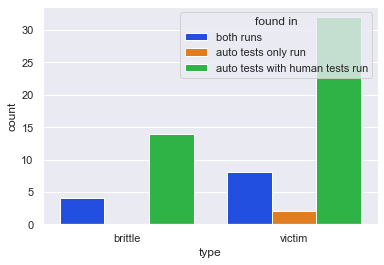

In [8]:
sbn.countplot(data=df_OD_all, x='type', hue='found in')
print(df_OD_all['found in'].value_counts())

if savefig:
    plt.savefig('./figures/auto_run_human_run_OD_occurences.png', dpi=1200)

## What does this tell us?
#### In combination with the human written tests, more OD pynguin tests have been detected, which indicates an interplay between the human and the pynguin tests. Probably some human tests tend to be polluters cause the pynguin tests to fail.

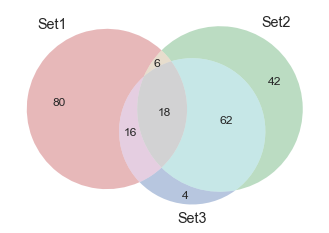

In [9]:
from matplotlib_venn import venn3, venn3_circles, venn2, venn2_circles

'''
Testing venn3.
'''
df_new = df_OD_all[['type', 'found in']]

df_new_both = df_new[df_new['found in'] == 'both runs']
df_new_human_auto = df_new[df_new['found in'] == 'auto tests with human tests run']
df_new_auto = df_new[df_new['found in'] == 'auto tests only run']

'''venn3(
    subsets=[
        set(df_new_both[''].type.to_list()),
        set(df_new_human_auto.type.to_list()),
        set(df_new_auto.type.to_list())
    ],
    set_labels=('both runs', 'human and auto run', 'auto run')
)'''
#plt.show()
items=[80, 42, 6, 4, 16, 62, 18]
labels=['Set1', 'Set2', 'Set3']
venn3(subsets=items, set_labels=labels)

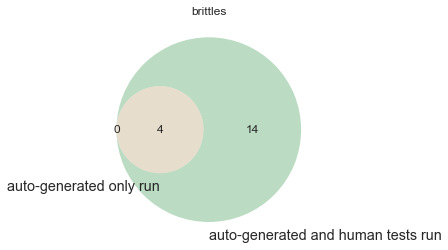

In [10]:
df_both = df_new[df_new['found in'] == 'both runs'].value_counts().reset_index()
if 0 in df_both.index:
    both_victim = df_both[0][0]
if 1 in df_both.index:
    both_brittle = df_both[0][1]

df_auto_human = df_new[df_new['found in'] == 'auto tests with human tests run'].value_counts().reset_index()
if 0 in df_auto_human.index:
    human_auto_victim = df_auto_human[0][0]
if 1 in df_auto_human.index:
    human_auto_brittle = df_auto_human[0][1]

df_auto = df_new[df_new['found in'] == 'auto tests only run'].value_counts().reset_index()
if 0 in df_auto.index:
    auto_victim = df_auto[0][0]
if 1 in df_auto.index:
    auto_brittle = df_auto[0][1]


items=[0, human_auto_brittle, both_brittle]
labels=['auto-generated only run', 'auto-generated and human tests run']
venn2(items, labels)
plt.title('brittles')

if savefig:
    plt.savefig('./figures/venn2_brittles.png', dpi=1200)

plt.show()


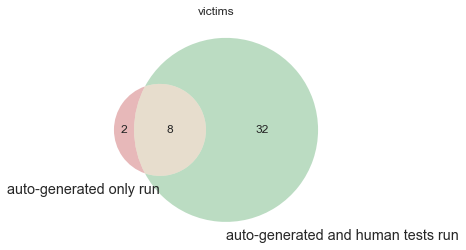

In [12]:
items=[auto_victim, human_auto_victim, both_victim]
venn2(items, labels)
plt.title('victims')

if savefig:
    plt.savefig('./figures/venn2_victims.png', dpi=1200)

plt.show()

In [15]:
df_no_tests_to_be_run_OD

,Project_Name,Project_URL,Project_Hash,Test_filename,Test_classname,Test_funcname,Test_parametrization,flaky?,Verdicts_sameOrder,Passed_sameOrder,...,Flaky_randomOrder_withinIteration,Verdict_sameOrder,Verdict_randomOrder,Order-dependent,Flaky_Infrastructure,Test_nodeid,Test_nodeid_inclPara,Victim,Brittle,type
0,EasyJWT,/scratch/scharnboec/FlakyRoot/projects/EasyJWT,NaN,NaN,pynguin_auto_tests_1653025019672_3713194.test_...,test_case_0,NaN,not flaky,{'Passed'},40,...,False,Passed,ZeroRuns,False,False,pynguin_auto_tests_1653025019672_3713194/test_...,pynguin_auto_tests_1653025019672_3713194/test_...,True,False,victim
1,SCout,/scratch/scharnboec/FlakyRoot/projects/SCout,NaN,NaN,pynguin_auto_tests_1653025019956_2079184.test_...,test_case_2,NaN,not flaky,{'Failed'},0,...,False,Failed,ZeroRuns,False,False,pynguin_auto_tests_1653025019956_2079184/test_...,pynguin_auto_tests_1653025019956_2079184/test_...,False,True,brittle
2,SCout,/scratch/scharnboec/FlakyRoot/projects/SCout,NaN,NaN,pynguin_auto_tests_1653025019956_2079184.test_...,test_case_4,NaN,not flaky,{'Passed'},40,...,False,Passed,ZeroRuns,False,False,pynguin_auto_tests_1653025019956_2079184/test_...,pynguin_auto_tests_1653025019956_2079184/test_...,True,False,victim
3,SCout,/scratch/scharnboec/FlakyRoot/projects/SCout,NaN,NaN,pynguin_auto_tests_1653025019956_2079184.test_...,test_case_7,NaN,not flaky,{'Failed'},0,...,False,Failed,ZeroRuns,False,False,pynguin_auto_tests_1653025019956_2079184/test_...,pynguin_auto_tests_1653025019956_2079184/test_...,False,True,brittle
4,SCout,/scratch/scharnboec/FlakyRoot/projects/SCout,NaN,NaN,pynguin_auto_tests_1653025019956_2079184.test_...,test_case_8,NaN,not flaky,{'Passed'},40,...,False,Passed,ZeroRuns,False,False,pynguin_auto_tests_1653025019956_2079184/test_...,pynguin_auto_tests_1653025019956_2079184/test_...,True,False,victim
5,SCout,/scratch/scharnboec/FlakyRoot/projects/SCout,NaN,NaN,pynguin_auto_tests_1653025019956_2079184.test_...,test_case_9,NaN,not flaky,{'Passed'},40,...,False,Passed,ZeroRuns,False,False,pynguin_auto_tests_1653025019956_2079184/test_...,pynguin_auto_tests_1653025019956_2079184/test_...,True,False,victim
6,Tale,/scratch/scharnboec/FlakyRoot/projects/Tale,NaN,NaN,pynguin_auto_tests_1653025019677_3296969.test_...,test_case_0,NaN,not flaky,{'Failed'},0,...,False,Failed,ZeroRuns,False,False,pynguin_auto_tests_1653025019677_3296969/test_...,pynguin_auto_tests_1653025019677_3296969/test_...,False,True,brittle
7,WikidataIntegrator,/scratch/scharnboec/FlakyRoot/projects/Wikidat...,NaN,NaN,pynguin_auto_tests_1653025019577_7599209.test_...,test_case_0,NaN,not flaky,{'Failed'},0,...,False,Failed,ZeroRuns,False,False,pynguin_auto_tests_1653025019577_7599209/test_...,pynguin_auto_tests_1653025019577_7599209/test_...,False,True,brittle
8,WikidataIntegrator,/scratch/scharnboec/FlakyRoot/projects/Wikidat...,NaN,NaN,pynguin_auto_tests_1653025019577_7599209.test_...,test_case_1,NaN,not flaky,{'Failed'},0,...,False,Failed,ZeroRuns,False,False,pynguin_auto_tests_1653025019577_7599209/test_...,pynguin_auto_tests_1653025019577_7599209/test_...,False,True,brittle
9,WikidataIntegrator,/scratch/scharnboec/FlakyRoot/projects/Wikidat...,NaN,NaN,pynguin_auto_tests_1653025019577_7599209.test_...,test_case_11,NaN,not flaky,{'Failed'},0,...,False,Failed,ZeroRuns,False,False,pynguin_auto_tests_1653025019577_7599209/test_...,pynguin_auto_tests_1653025019577_7599209/test_...,False,True,brittle


In [16]:
df_OD

,Project_Name,Project_URL,Project_Hash,Test_filename,Test_classname,Test_funcname,Test_parametrization,flaky?,Verdicts_sameOrder,Passed_sameOrder,...,Flaky_randomOrder_withinIteration,Verdict_sameOrder,Verdict_randomOrder,Order-dependent,Flaky_Infrastructure,Test_nodeid,Test_nodeid_inclPara,Victim,Brittle,type
0,SCout,/scratch/scharnboec/FlakyRoot/projects/SCout,NaN,NaN,pynguin_auto_tests_1653025019956_2079184.test_...,test_case_2,NaN,not flaky,{'Failed'},0,...,False,Failed,ZeroRuns,False,False,pynguin_auto_tests_1653025019956_2079184/test_...,pynguin_auto_tests_1653025019956_2079184/test_...,False,True,brittle
1,SCout,/scratch/scharnboec/FlakyRoot/projects/SCout,NaN,NaN,pynguin_auto_tests_1653025019956_2079184.test_...,test_case_4,NaN,not flaky,{'Passed'},40,...,False,Passed,ZeroRuns,False,False,pynguin_auto_tests_1653025019956_2079184/test_...,pynguin_auto_tests_1653025019956_2079184/test_...,True,False,victim
2,SCout,/scratch/scharnboec/FlakyRoot/projects/SCout,NaN,NaN,pynguin_auto_tests_1653025019956_2079184.test_...,test_case_7,NaN,not flaky,{'Failed'},0,...,False,Failed,ZeroRuns,False,False,pynguin_auto_tests_1653025019956_2079184/test_...,pynguin_auto_tests_1653025019956_2079184/test_...,False,True,brittle
3,SCout,/scratch/scharnboec/FlakyRoot/projects/SCout,NaN,NaN,pynguin_auto_tests_1653025019956_2079184.test_...,test_case_8,NaN,not flaky,{'Passed'},40,...,False,Passed,ZeroRuns,False,False,pynguin_auto_tests_1653025019956_2079184/test_...,pynguin_auto_tests_1653025019956_2079184/test_...,True,False,victim
4,Tale,/scratch/scharnboec/FlakyRoot/projects/Tale,NaN,NaN,pynguin_auto_tests_1653025019677_3296969.test_...,test_case_0,NaN,not flaky,{'Failed'},0,...,False,Failed,ZeroRuns,False,False,pynguin_auto_tests_1653025019677_3296969/test_...,pynguin_auto_tests_1653025019677_3296969/test_...,False,True,brittle
5,access-modifiers,/scratch/scharnboec/FlakyRoot/projects/access-...,NaN,NaN,pynguin_auto_tests_1653025019959_4930659.test_...,test_case_1,NaN,not flaky,{'Failed'},0,...,False,Failed,ZeroRuns,False,False,pynguin_auto_tests_1653025019959_4930659/test_...,pynguin_auto_tests_1653025019959_4930659/test_...,False,True,brittle
6,access-modifiers,/scratch/scharnboec/FlakyRoot/projects/access-...,NaN,NaN,pynguin_auto_tests_1653025019959_4930659.test_...,test_case_2,NaN,not flaky,{'Passed'},40,...,False,Passed,ZeroRuns,False,False,pynguin_auto_tests_1653025019959_4930659/test_...,pynguin_auto_tests_1653025019959_4930659/test_...,True,False,victim
7,freezegun,/scratch/scharnboec/FlakyRoot/projects/freezegun,NaN,NaN,pynguin_auto_tests_1653025019436_6809546.test_...,test_case_0,NaN,not flaky,{'Passed'},40,...,False,Passed,ZeroRuns,False,False,pynguin_auto_tests_1653025019436_6809546/test_...,pynguin_auto_tests_1653025019436_6809546/test_...,True,False,victim
8,keras-layer-normalization,/scratch/scharnboec/FlakyRoot/projects/keras-l...,NaN,NaN,pynguin_auto_tests_1653025020114_2411217.test_...,test_case_2,NaN,not flaky,{'Passed'},40,...,False,Passed,ZeroRuns,False,False,pynguin_auto_tests_1653025020114_2411217/test_...,pynguin_auto_tests_1653025020114_2411217/test_...,True,False,victim
9,pycoin,/scratch/scharnboec/FlakyRoot/projects/pycoin,NaN,NaN,pynguin_auto_tests_1653025020188_6343126.test_...,test_case_6,NaN,not flaky,{'Passed'},40,...,False,Passed,ZeroRuns,False,False,pynguin_auto_tests_1653025020188_6343126/test_...,pynguin_auto_tests_1653025020188_6343126/test_...,True,False,victim
